In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/content/DataDNA Dataset Challenge - E-commerce Dataset - November 2025.xlsx")

In [3]:
df.head()

,event_id,event_type,event_date,customer_id,product_id,country,latitude,longitude,region,channel,...,unit_price_local,discount_code,discount_local,tax_local,net_revenue_local,fx_rate_to_usd,net_revenue_usd,is_refunded,refund_datetime,refund_reason
0,DB4F1A096586,order,2024-12-09 00:11:27,CUST0001946,PROD0083,United States,39.8283,-98.5795,NaN,Website,...,36.70,NaN,0.0,0.00,110.10,1.00,110.10,False,NaT,NaN
1,3550A69EEA36,order,2025-08-11 21:31:03,CUST0003776,PROD0049,Australia,-25.2744,133.7751,APAC,Website,...,19.70,NaN,0.0,9.85,108.35,0.66,71.51,False,NaT,NaN
2,0C3CAE65E90C,order,2025-09-30 15:39:28,CUST0001105,PROD0075,Canada,56.1304,-106.3468,NaN,Website,...,20.12,NaN,0.0,1.01,21.13,1.00,21.13,False,NaT,NaN
3,7DDC83355865,invoice,2024-09-26 04:13:11,CUST0003164,PROD0017,United States,39.8283,-98.5795,NaN,Partner,...,19.00,NaN,0.0,0.00,190.00,1.00,190.00,False,NaT,NaN
4,DAE0B37D8815,order,2024-06-23 16:03:04,CUST0003410,PROD0099,United States,39.8283,-98.5795,NaN,Website,...,29.38,NaN,0.0,0.00,88.14,1.00,88.14,False,NaT,NaN


In [4]:
df.columns

Index(['event_id', 'event_type', 'event_date', 'customer_id', 'product_id',
       'country', 'latitude', 'longitude', 'region', 'channel',
       'payment_method', 'currency', 'quantity', 'unit_price_local',
       'discount_code', 'discount_local', 'tax_local', 'net_revenue_local',
       'fx_rate_to_usd', 'net_revenue_usd', 'is_refunded', 'refund_datetime',
       'refund_reason'],
      dtype='object')

In [5]:
df.shape

(48000, 23)

In [6]:
df.dtypes

,0
event_id,object
event_type,object
event_date,datetime64[ns]
customer_id,object
product_id,object
country,object
latitude,float64
longitude,float64
region,object
channel,object


In [7]:
df.isnull().sum()

,0
event_id,0
event_type,0
event_date,0
customer_id,0
product_id,0
country,0
latitude,0
longitude,0
region,19579
channel,0


In [8]:
# So the reason missing region is replaceable by unkown
# The discount code is missing that may be because the dont get any discount
# So we can replace it by no_discount
# Refund detetime notmention_ because the refund datetime and refund reason
# are the product which is not refund thats why they didnt metion the date an aslo the reason


# So lets fill missing

In [9]:
df['region']=df['region'].fillna("Unknown")

In [10]:
df['discount_code'].fillna("No_Discount")

,discount_code
0,No_Discount
1,No_Discount
2,No_Discount
3,No_Discount
4,No_Discount
...,...
47995,SAVE5
47996,No_Discount
47997,No_Discount
47998,NEWCUSTOMER10


In [11]:
df['refund_reason']=df['refund_reason'].fillna("Not_Refunded")

In [12]:
# Verify the missing values

In [13]:
df.isnull().sum()

,0
event_id,0
event_type,0
event_date,0
customer_id,0
product_id,0
country,0
latitude,0
longitude,0
region,0
channel,0


In [14]:
# So date time is intentinally showing 46995,that mean 46995
# orders are not refunded yet.


In [15]:
# lets find out the objects columns

In [16]:
df.select_dtypes(include=["object"]).columns

Index(['event_id', 'event_type', 'customer_id', 'product_id', 'country',
       'region', 'channel', 'payment_method', 'currency', 'discount_code',
       'refund_reason'],
      dtype='object')

In [17]:
cat_col=['event_id', 'event_type', 'customer_id', 'product_id', 'country',
       'region', 'channel', 'payment_method', 'currency', 'discount_code',
       'refund_reason']

In [18]:
for i in cat_col:
  print(i,":-",df[i].unique(),)
  print(".............")

event_id :- ['DB4F1A096586' '3550A69EEA36' '0C3CAE65E90C' ... '31681CA1A687'
 'E5332EABFA60' '64381905AD06']
.............
event_type :- ['order' 'invoice']
.............
customer_id :- ['CUST0001946' 'CUST0003776' 'CUST0001105' ... 'CUST0001996' 'CUST0001296'
 'CUST0003384']
.............
product_id :- ['PROD0083' 'PROD0049' 'PROD0075' 'PROD0017' 'PROD0099' 'PROD0026'
 'PROD0059' 'PROD0100' 'PROD0027' 'PROD0067' 'PROD0047' 'PROD0055'
 'PROD0078' 'PROD0074' 'PROD0076' 'PROD0053' 'PROD0003' 'PROD0033'
 'PROD0020' 'PROD0022' 'PROD0012' 'PROD0087' 'PROD0002' 'PROD0019'
 'PROD0025' 'PROD0029' 'PROD0041' 'PROD0077' 'PROD0023' 'PROD0035'
 'PROD0006' 'PROD0052' 'PROD0089' 'PROD0086' 'PROD0050' 'PROD0046'
 'PROD0072' 'PROD0008' 'PROD0007' 'PROD0080' 'PROD0039' 'PROD0084'
 'PROD0011' 'PROD0062' 'PROD0063' 'PROD0037' 'PROD0095' 'PROD0001'
 'PROD0048' 'PROD0090' 'PROD0042' 'PROD0082' 'PROD0060' 'PROD0073'
 'PROD0038' 'PROD0014' 'PROD0066' 'PROD0054' 'PROD0098' 'PROD0068'
 'PROD0058' 'PROD0051' 'P

In [19]:
# lets do the feature engg.
# drop the event_id , customer_id,product_id

In [20]:
 df.drop(columns=['event_id','customer_id','product_id'], inplace=True)

In [21]:
df.head()

,event_type,event_date,country,latitude,longitude,region,channel,payment_method,currency,quantity,unit_price_local,discount_code,discount_local,tax_local,net_revenue_local,fx_rate_to_usd,net_revenue_usd,is_refunded,refund_datetime,refund_reason
0,order,2024-12-09 00:11:27,United States,39.8283,-98.5795,Unknown,Website,Credit Card,USD,3,36.70,NaN,0.0,0.00,110.10,1.00,110.10,False,NaT,Not_Refunded
1,order,2025-08-11 21:31:03,Australia,-25.2744,133.7751,APAC,Website,Invoice,AUD,5,19.70,NaN,0.0,9.85,108.35,0.66,71.51,False,NaT,Not_Refunded
2,order,2025-09-30 15:39:28,Canada,56.1304,-106.3468,Unknown,Website,Credit Card,USD,1,20.12,NaN,0.0,1.01,21.13,1.00,21.13,False,NaT,Not_Refunded
3,invoice,2024-09-26 04:13:11,United States,39.8283,-98.5795,Unknown,Partner,Credit Card,USD,10,19.00,NaN,0.0,0.00,190.00,1.00,190.00,False,NaT,Not_Refunded
4,order,2024-06-23 16:03:04,United States,39.8283,-98.5795,Unknown,Website,Credit Card,USD,3,29.38,NaN,0.0,0.00,88.14,1.00,88.14,False,NaT,Not_Refunded


In [22]:
# lets check the duplicate records

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
# lets start for EDA -

In [25]:
df.columns

Index(['event_type', 'event_date', 'country', 'latitude', 'longitude',
       'region', 'channel', 'payment_method', 'currency', 'quantity',
       'unit_price_local', 'discount_code', 'discount_local', 'tax_local',
       'net_revenue_local', 'fx_rate_to_usd', 'net_revenue_usd', 'is_refunded',
       'refund_datetime', 'refund_reason'],
      dtype='object')

In [27]:
# So lets for the check event types

In [30]:
df['event_type'].unique()

array(['order', 'invoice'], dtype=object)

In [32]:
df['event_type'].value_counts()

,count
event_type,
order,33601
invoice,14399


In [33]:
df.groupby("event_type")['net_revenue_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
event_type,,,,,,,,
invoice,14399.0,651.337073,1174.999209,4.0,53.90,196.28,660.01,14969.85
order,33601.0,668.244367,1194.135810,4.0,55.02,200.00,687.36,14970.13


In [34]:
df['is_refunded'].unique()

array([False,  True])

In [36]:
df.groupby("event_type")['is_refunded'].value_counts().unstack()

is_refunded,False,True
event_type,,
invoice,14083,316
order,32912,689


<Axes: xlabel='event_type', ylabel='count'>

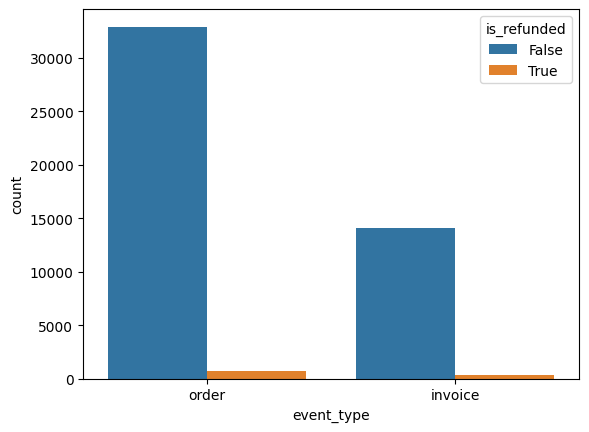

In [38]:
sns.countplot(data=df,x="event_type",hue="is_refunded")

In [39]:
df.groupby("event_type")['payment_method'].value_counts().unstack()

payment_method,Credit Card,Invoice,PayPal,Wire
event_type,,,,
invoice,7958,3575,2138,728
order,18382,8480,5077,1662


In [41]:
df.groupby(["event_type",'payment_method'])[ "is_refunded"].value_counts().unstack()

is_refunded                False  True 
event_type payment_method              
invoice    Credit Card      7783    175
           Invoice          3504     71
           PayPal           2087     51
           Wire              709     19
order      Credit Card     18001    381
           Invoice          8315    165
           PayPal           4976    101
           Wire             1620     42

In [42]:
stack = df.groupby(["event_type",'payment_method'])[ "is_refunded"].value_counts().unstack()

<Axes: xlabel='event_type,payment_method'>

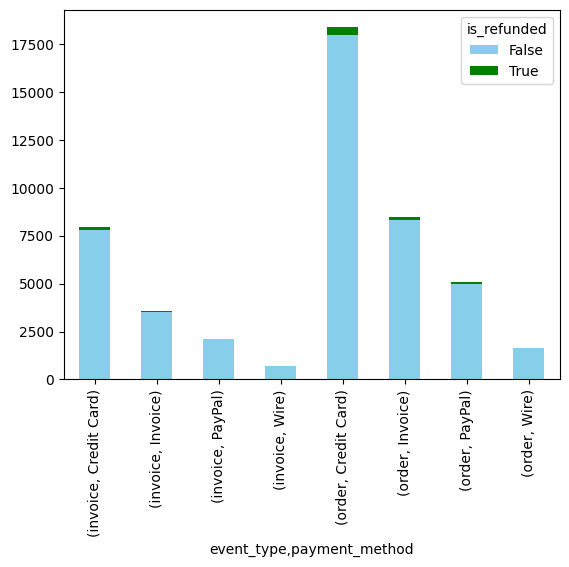

In [45]:
stack.plot(kind='bar',stacked= True,color=['skyblue','green'])

In [46]:
# Channel

In [51]:
df['channel'].unique()

array(['Website', 'Partner', 'Direct Sales', 'Marketplace', 'Reseller'],
      dtype=object)

In [56]:
df.columns

Index(['event_type', 'event_date', 'country', 'latitude', 'longitude',
       'region', 'channel', 'payment_method', 'currency', 'quantity',
       'unit_price_local', 'discount_code', 'discount_local', 'tax_local',
       'net_revenue_local', 'fx_rate_to_usd', 'net_revenue_usd', 'is_refunded',
       'refund_datetime', 'refund_reason'],
      dtype='object')

In [52]:
 df['event_type'].value_counts()

,count
event_type,
order,33601
invoice,14399


In [54]:
df.groupby("event_type")['net_revenue_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
event_type,,,,,,,,
invoice,14399.0,651.337073,1174.999209,4.0,53.90,196.28,660.01,14969.85
order,33601.0,668.244367,1194.135810,4.0,55.02,200.00,687.36,14970.13


In [55]:
df['Direct Sales'].unique()

KeyError: 'Direct Sales'